In [1]:
import gym
from gym import wrappers
import numpy as np
from collections import deque

env = gym.make('FrozenLake-v0')
# env = wrappers.Monitor(env, '/tmp/frozen-lake', force=True)

print env.action_space
print env.observation_space

on = env.observation_space.n
an = env.action_space.n

[2017-03-27 23:15:44,219] Making new env: FrozenLake-v0


Discrete(4)
Discrete(16)


In [2]:
# Parameters.
episodes = 3000
gamma = 0.99
alpha = 0.1
eps = 0.8
eps_decay = 0.995

# Q function.
Q = np.ones([on, an])

In [3]:
history = deque(maxlen=200)
r_history = deque(maxlen=100)
means = []
stds = []

for ep in range(episodes + 1):
    obs = env.reset()
    done = False
    while not done:
        if np.random.uniform() <= eps:
            act = env.action_space.sample()
        else:
            act = np.argmax(Q[obs])
        obs_new, r, done, _ = env.step(act)
        history.append([obs, act, obs_new, r])
        obs = obs_new
    
    r_history.append(r)
    means.append(np.mean(list(r_history)))
    stds.append(np.std((r_history)))
    # Ignore the last observation.
    obs, act, obs_new, r = history.pop()
    Q[obs, act] = (1.0 - alpha) * Q[obs, act] + alpha * r
    while len(history):
        obs, act, obs_new, r = history.pop()
        Q[obs, act] = (1.0 - alpha) * Q[obs, act] + alpha * (r + gamma * np.max(Q[obs_new]))
    eps = eps * eps_decay
print "Finished!"

Finished!


In [4]:
obs = env.reset()
env.render()
done = False
while not done:
    act = np.argmax(Q[obs])
    obs_new, r, done, _ = env.step(act)
    obs = obs_new
    # Not properly displayed on github. Uncomment locally.
    # env.render()


SFFF
FHFH
FFFH
HFFG


In [5]:
env.close()
# gym.upload('/tmp/frozen-lake', api_key='sk_1ocsn6B6SNqZK13Kxezg')

In [6]:
# Visualization
np.set_printoptions(precision=3, suppress=True)

def disp_V(Q):
    V = np.max(Q, axis=1)
    print np.reshape(V, [4, 4])

def disp_policy(Q):
    mu = np.argmax(Q, axis=1)
    mu = np.reshape(mu, [4, 4]).astype('str')
    mu[mu == '0'] = 'L'
    mu[mu == '1'] = 'D'
    mu[mu == '2'] = 'R'
    mu[mu == '3'] = 'U'
    print mu

env.reset()  
env.render()
print "Q function:"
print Q

print "Value function:"
disp_V(Q)

print "Policy:"
disp_policy(Q)


SFFF
FHFH
FFFH
HFFG
Q function:
[[ 0.508  0.416  0.431  0.422]
 [ 0.359  0.32   0.355  0.461]
 [ 0.345  0.328  0.333  0.419]
 [ 0.304  0.231  0.309  0.39 ]
 [ 0.521  0.356  0.419  0.429]
 [ 1.     1.     1.     1.   ]
 [ 0.371  0.156  0.162  0.16 ]
 [ 1.     1.     1.     1.   ]
 [ 0.25   0.401  0.433  0.539]
 [ 0.443  0.591  0.466  0.401]
 [ 0.573  0.353  0.374  0.385]
 [ 1.     1.     1.     1.   ]
 [ 1.     1.     1.     1.   ]
 [ 0.539  0.542  0.728  0.453]
 [ 0.668  0.883  0.691  0.675]
 [ 1.     1.     1.     1.   ]]
Value function:
[[ 0.508  0.461  0.419  0.39 ]
 [ 0.521  1.     0.371  1.   ]
 [ 0.539  0.591  0.573  1.   ]
 [ 1.     0.728  0.883  1.   ]]
Policy:
[['L' 'U' 'U' 'U']
 ['L' 'L' 'L' 'L']
 ['U' 'D' 'L' 'L']
 ['L' 'R' 'D' 'L']]


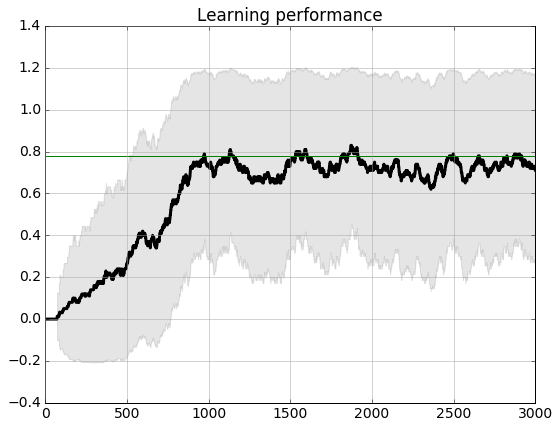

In [7]:
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['font.size'] = 14
plt.rcParams['image.cmap'] = 'gray'

x = range(episodes + 1)
means = np.array(means)
stds = np.array(stds)

# Plot.
plt.plot(x, means, color='k', linewidth=3)
plt.plot((0, episodes), (0.78, 0.78), 'g')
plt.fill_between(x, means - stds, means + stds, alpha=0.1, color='k')
plt.tight_layout()
plt.grid(b=True, which='both', color='0.65',linestyle='-')

plt.title("Learning performance");